# Model Description

To include competition for space, we start with a set of $N$ sites that we think of as spatial locations that can be either empty or occupied by one individual. The process is then described by the following simple rules:

1. Independently of one another, individuals give birth to a single offspring at rate $\beta$ and die at the normalized rate one.

2. At birth, the offspring is sent to a site chosen uniformly at random. If the site is empty, it becomes occupied; otherwise, the birth is suppressed.

**The rate at which new offspring are produced is** 
$$\beta_x=\beta x(1-\frac{x}{N})$$
where $1-\frac{x}{N}$ is the fraction of empty sites.

**The rate at which the individual dies is**
$$\delta_x=x$$
for all $x=0,1,2,...,N$

## Model Construction
Using the superposition and thinning properties for independent Poisson processes gives the following construction:

- Regardless of the number of individuals, the time to the next (potential) event is exponentially distributed with parameter $(\beta+1) N .$

- At that time, we choose a site uniformly at random, say site $i .$

- If site $i$ is empty, we do nothing. Otherwise,

    - with probability $\beta /(\beta+1),$ we choose another site uniformly at random and place an individual at this site if it is empty

    - with probability $1 /(\beta+1),$ we kill the individual at site $i .$
    
## Long-term behavior
The process is closedly related to the **deterministic logistic equation**. The equation depends on two parameters-**the intrinsic rate of growth $r$ and the carrying capacity $K$**:
$$x^{\prime}(t)=r x\left(1-\frac{x}{K}\right)$$
Now, letting
$$
r=\beta-1 \quad \text { and } \quad K=N\left(1-\frac{1}{\beta}\right)=N\left(\frac{\beta-1}{\beta}\right)
$$
we have
$$
\begin{aligned} r x\left(1-\frac{x}{K}\right) &=(\beta-1)\left(1-\frac{\beta x}{N(\beta-1)}\right) x \\ &=\left(\beta-1-\frac{\beta x}{N}\right) x=\beta x\left(1-\frac{k}{N}\right)-x=\beta_{x}-\delta_{x} \end{aligned}
$$
Thus, the deterministic equation becomes a stochastic process when:
- the intrinsic rate of growth is the difference between the intrinsic birth rate and the intrinsic death rate.

- when individuals compete for space, the fraction of space that is occupied approaches $1-1/\beta$.


**Because the population is uniformly bounded, random fluctuations will eventually drive the stochastic model to extinction.** As we have one absorbing state of `no individual`, all other states are transient. However, **when $\beta>1$, the expected time to extinction increases exponentially with the size of the system.** The behavior before extinction, which is characterized by a so-called *quasi-stationary distribution*.

## Quasi-stationary distribution
The quasi-stationary distribution of the logistic growth process is the stationary distribution of the process conditioned on nonextinction. It is not equal but it is wellapproximated by the stationary distribution of the process $Y_t$ obtained by *removing state zero from the state space, so all states become recurrent.* That is, $\delta_1=0$.
Note that there is indeed a unique stationary distribution $\pi$ because the process is finite and irreducible:

*The stationary distribution $\pi$ of the process $\left(Y_{t}\right)$ satisfies*
$$
\pi(x)=\frac{\pi(1)}{x}\left(\frac{\beta}{N}\right)^{x-1} \frac{(N-1) !}{(N-x) !} \text { for } x=1,2, \ldots, N
$$
We notice that
$$
\frac{\pi(x+1)}{\pi(x)}=\frac{\beta_{x}}{\delta_{x+1}}=\frac{x}{x+1} \frac{\beta_{x}}{\delta_{x}} \approx 1 \quad \text { when } \quad \beta_{x} \approx \delta_{x}
$$
indicating that the most visited states are near the carrying capacity *K*.

## Time to extinction
If we do include zero as absorbing state, the time to extinction is defined as 
$$
T=\inf \left\{t>0: X_{t}=0\right\}
$$
To compute the expected time to extinction, we also introduce
$$
T_{x}=E_{x}(T)=E\left(T | X_{0}=x\right) \quad \text { and } \quad \tau_{x}=T_{x+1}-T_{x}
$$
The following theorem gives an expression for $\tau_x$ and holds for birth and death processes in general:

For all $x=0,1,2, \ldots, N-1$
$$
\tau_{x}=\prod_{z=1}^{x} \frac{\delta_{z}}{\beta_{z}}\left[\tau_{0}-\sum_{y=1}^{x} \frac{1}{\beta_{y}} \prod_{z=1}^{y} \frac{\beta_{z}}{\delta_{z}}\right]
$$
since $\tau_{x} \geq 0$ and $\tau_{0}=T_{1},$ the theorem implies that
$$
\begin{aligned} T_{1} & \geq \sum_{y=1}^{x} \frac{1}{\beta_{y}} \prod_{z=1}^{y} \frac{\beta_{z}}{\delta_{z}} \geq \frac{1}{\beta_{K / 2}} \prod_{z=1}^{K / 2} \frac{\beta_{z}}{\delta_{z}} \geq \frac{1}{\beta_{K / 2}}\left[\beta\left(1-\frac{K}{2 N}\right)\right]^{K / 2} \\ & \geq \frac{1}{\beta_{K / 2}}\left[\beta\left(1-\frac{1-\beta^{-1}}{2}\right)\right]^{K / 2}=\frac{1}{\beta_{K / 2}}\left(\frac{\beta+1}{2}\right)^{K / 2} \end{aligned}
$$

## Conclusion
With probability $p_{s}=1-1 / \beta=$ probability of survival of the simple birth and death process starting with one individual, the population first grows until the fraction of occupied sites approaches $p_{s},$ then fluctuates randomly around this value, and finally collapses after a time with an expected value that is large.

## Implementation
Let's first implement the construction described in *Model Construction* section on a 2D plane.

In [35]:
import numpy as np
from scipy.stats import expon

beta = 2
n = 5 # size of the plane
T = 100 # simulation time

def evolve(start = 1): # start with x individual
    global beta, n, T
    N = n**2
    dieRate = 1/(beta+1)
    birthRate = beta/(beta+1)
    universe = np.zeros(N, dtype=int)
    inits = np.random.choice(range(N),size=start,replace=False)
    for i in inits:
        universe[i]=1
    rv = expon(scale=1/((beta+1)*N))
    t = 0
    simlst = [1]
    ts = [0]
    count = start
    while count>0 and t<T:
        x=np.random.choice(np.where(universe==1)[0])
        rn = np.random.choice([0,1],p=[dieRate, birthRate])
        if rn==0:
            universe[x] = 0
            count-=1
        else:
            x=np.random.choice(N)
            if universe[x]==0:
                count+=1
                universe[x]=1
        t+=rv.rvs()
        ts.append(t)
        simlst.append(count)
    return ts,simlst

**Let's first change the value of $\beta$**

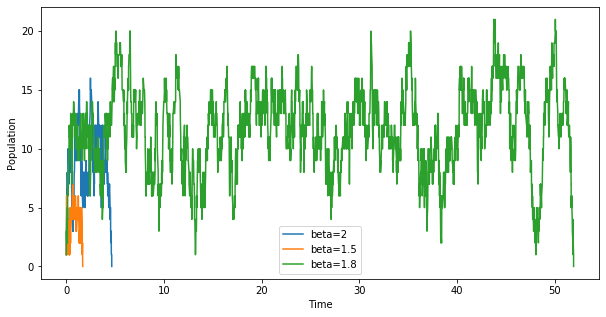

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
for i in [2,1.5,1.8]:
    beta = i
    tseq, nums = evolve(2)
    plt.plot(tseq,nums,'-',label='beta={}'.format(beta))

plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()

**Now, let's check the carrying capacity**

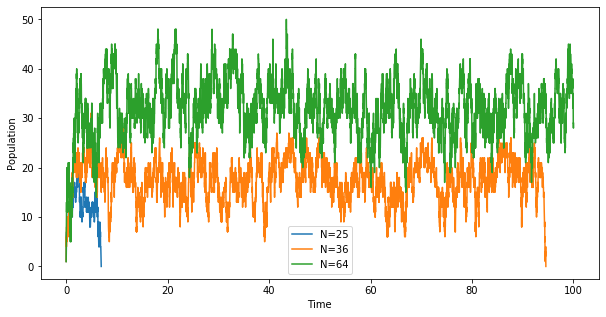

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
beta = 2
for i in [5,6,8]:
    n=i
    tseq, nums = evolve(5)
    plt.plot(tseq,nums,'-',label='N={}'.format(n**2))

plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()

### Predator-prey system
Each of the $N$ sites is either empty or occupied by a prey or a predator. Preys and predators die at rate one and give birth at respective rates $\beta_{1}$ and $\beta_{2}$ to an offspring which is then sent to a site chose uniformly at random. Births of preys are suppressed if the target site is not empty while births of predators are suppressed if the target site is not occupied by a prey, which models the fact that the predator needs to feed on the prey to survive.

There can be only three regimes: extinction of preys and predators,survival of the preys for a long time, and coexistence for a long time.

In [279]:
import matplotlib.animation as animation

b1 = 3
b2 = 2
        
#initial state
n1 = 4 # 4 predator
n2 = 4 # 4 prey

def ppEvolve(n, num1, num2, beta1, beta2, Tlen=1000):
    N = n**2
    universe= np.zeros(N,dtype=int)
    universe[np.random.choice(N,size=num1,replace=False).tolist()]=1
    universe[np.random.choice(np.where(universe==0)[0],size=num2,replace=False).tolist()]=2
    cts1 = [num1]
    cur1 = num1
    cts2 = [num2]
    cur2 = num2
    
    rv1 = expon(scale=1/((beta1+1)*N))
    rv2 = expon(scale=1/((beta2+1)*N))
    
    p1die = 1/(beta1+1)
    p1bir = 1-p1die
    p2die = 1/(beta2+1)
    p2bir = 1-p2die
    Ts = [0]
    for i in range(Tlen):
        a_,b_=rv1.rvs(),rv2.rvs()
        if a_<b_:
            event=1
            pp = [p1die, p1bir]
            Ts.append(Ts[-1]+a_)
        else:
            event=2
            pp = [p2die, p2bir]
            Ts.append(Ts[-1]+b_)
        occ = np.where(universe==event)[0]
        if occ.size>0:
            c=np.random.choice(occ)
            rn = np.random.choice([0,1],p=pp)
            if event==1:
                if rn==0:
                    universe[c] = 0
                    cur1 =max(cur1-1,0)
                else:
                    c=np.random.choice(N)
                    if universe[c]==2:
                        cur2= max(cur2-1,0)
                        universe[c]=1
                        cur1+=1
                        
            else:
                if rn==0:
                    universe[c] = 0
                    cur2=max(cur2-1,0)

                elif rn == 1:
                    c=np.random.choice(N)
                    if universe[c]==0:
                        universe[c]=2
                        cur2+=1
                
        cts1.append(cur1)
        cts2.append(cur2)
    return Ts, cts1, cts2, universe

In [301]:
Tseq, count1, count2,u=ppEvolve(6,4,4,2,2)

Text(0, 0.5, 'Population')

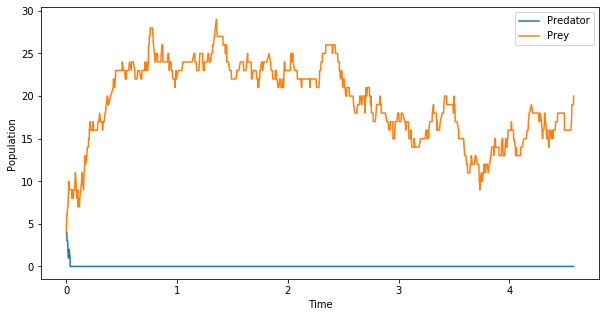

In [302]:
plt.plot(Tseq,count1,'-',label='Predator')
plt.plot(Tseq,count2,'-',label='Prey')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Population')

**From figure above, we see survival of the Preys for a long time, now, let's try different $\beta,n_1,n_2$

Text(0, 0.5, 'Population')

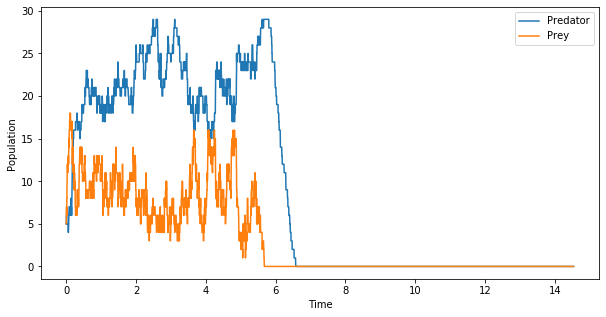

In [322]:
b1 = 5
b2 = 12.2
n1 = 5
n2 = 5
Tseq, count1, count2,u=ppEvolve(6,n1,n2,b1,b2,10000)
plt.plot(Tseq,count1,'-',label='Predator')
plt.plot(Tseq,count2,'-',label='Prey')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Population')

**Now both prey and predator distincted,keep trying

Text(0, 0.5, 'Population')

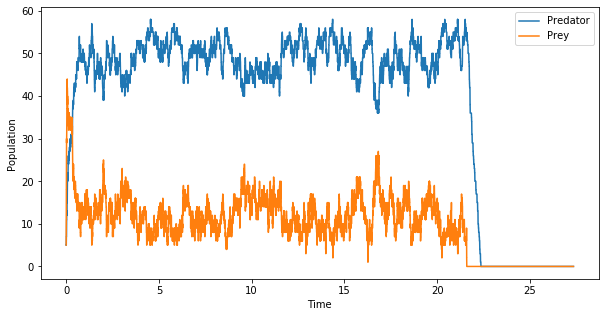

In [312]:
b1 = 5
b2 = 50
n1 = 5
n2 = 5
Tseq, count1, count2,u=ppEvolve(8,n1,n2,b1,b2,100000)
plt.plot(Tseq,count1,'-',label='Predator')
plt.plot(Tseq,count2,'-',label='Prey')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Population')

**In this case, they are coexisting for quite long time.